In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


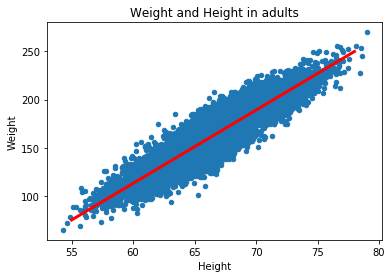

In [14]:
def plot_humans():
    df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')

plot_humans()
# Here we're plotting the red line 'by hand' with fixed values
# we'll try to learn this line with an algorithm below
plt.plot([55, 78], [75,250], color='red', linewidth=3)

In [15]:
def line(x, w=0, b=0):
    return x*w+b

In [16]:
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [17]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

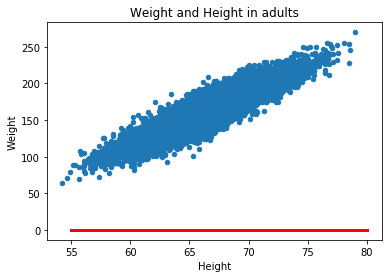

In [18]:
plot_humans()
plt.plot(x, yhat, color='red', linewidth=3)

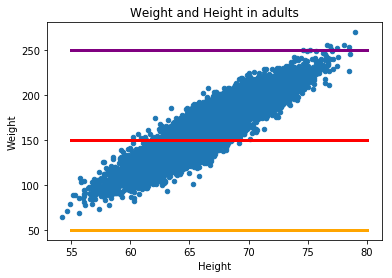

In [19]:
plot_humans()
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='purple', linewidth=3)

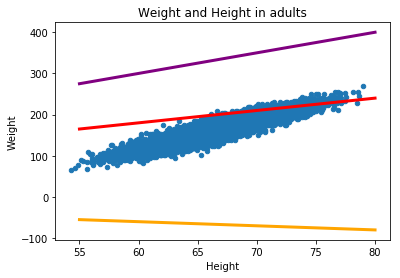

In [20]:
plot_humans()
plt.plot(x, line(x, w=5), color='purple', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3)

In [21]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [22]:
X = df[['Height']].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [24]:
X.shape

(10000, 1)

In [25]:
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [26]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [27]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

In [28]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.1224504786412

In [29]:
y_pred = line(X, w=2, b=20)
mean_squared_error(y_true, y_pred.ravel())

708.9129575511095

Text(0.5,0,'b')

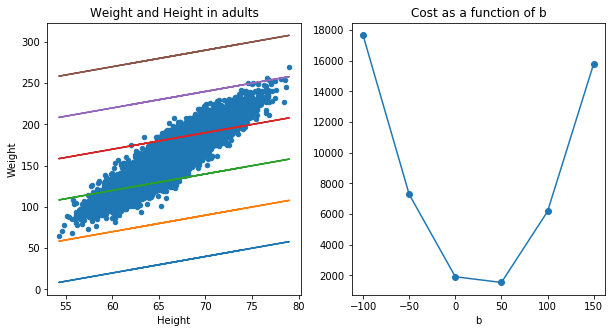

In [30]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = [] # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [32]:
model = Sequential()

In [34]:
model.add(Dense(1, input_shape=(1,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [36]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 77us/step - loss: 2679.7586
Epoch 2/40
10000/10000 [==============================] - 1s 56us/step - loss: 586.9721
Epoch 3/40
10000/10000 [==============================] - 1s 52us/step - loss: 507.6372
Epoch 4/40
10000/10000 [==============================] - 1s 57us/step - loss: 456.4203
Epoch 5/40
10000/10000 [==============================] - 1s 56us/step - loss: 348.7812
Epoch 6/40
10000/10000 [==============================] - 1s 59us/step - loss: 329.3738
Epoch 7/40
10000/10000 [==============================] - 1s 54us/step - loss: 333.6584
Epoch 8/40
10000/10000 [==============================] - 1s 53us/step - loss: 251.9859
Epoch 9/40
10000/10000 [==============================] - 1s 54us/step - loss: 266.6047
Epoch 10/40
10000/10000 [==============================] - 1s 58us/step - loss: 263.7713
Epoch 11/40
10000/10000 [==============================] - 1s 60us/step - loss: 293.6914
Epoch 12/40
10000/10000 [====

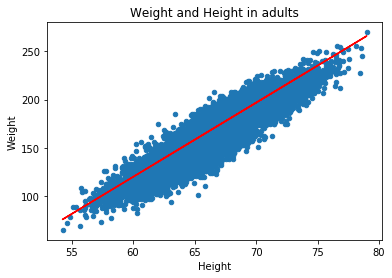

In [37]:
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [41]:
# NOTE: Book indicated this should only return W, B... 
# I had to add two more parameters to get this to run successfully. 
# I'm guessing it is due to an updated version
#
W, B, C, d = model.get_weights()
W

array([[-3.470819]], dtype=float32)

In [42]:
B

array([162.84633], dtype=float32)

In [43]:
w = W[0,0]

In [44]:
b = B[0]

In [45]:
b

162.84633

In [46]:
w

-3.470819

In [47]:
C

array([[-2.2195058]], dtype=float32)

In [48]:
d

array([18.981266], dtype=float32)

In [49]:
from sklearn.metrics import r2_score

In [50]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.803


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2)

In [55]:
len(X_train)

8000

In [56]:
len(X_test)

2000

In [57]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [58]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [59]:
from sklearn.metrics import mean_squared_error as mse

In [61]:
err = mse(y_train, y_train_pred)
print("Mean Squared Error (Train set):\t{:0.1f}".format(err))

err = mse(y_test, y_test_pred)
print("Mean Squared Error (Test set):\t{:0.1f}".format(err))

Mean Squared Error (Train set):	217.1
Mean Squared Error (Test set):	214.7


In [62]:
r2 = r2_score(y_train, y_train_pred)
print("R2 score (Train set):\t{:0.3f}".format(r2))

r2 = r2_score(y_test, y_test_pred)
print("R2 score (Test set):\t{:0.3f}".format(r2))

R2 score (Train set):	0.789
R2 score (Test set):	0.794


## Classification

In [64]:
df = pd.read_csv('./data/user_visit_duration.csv')

In [65]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


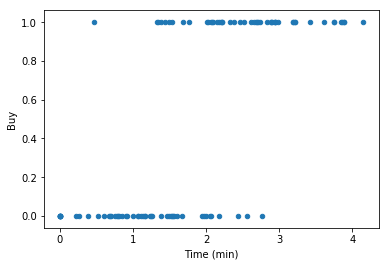

In [66]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [67]:
# let's demonstrate how Linear Regression fails here
X = df[['Time (min)']].values
y = df['Buy'].values

# re-use the model from before but re-initialize it 
model.set_weights([[[ 1.0]], [0.]])

# fit the model
model.fit(X, y, epochs=200, verbose=0)

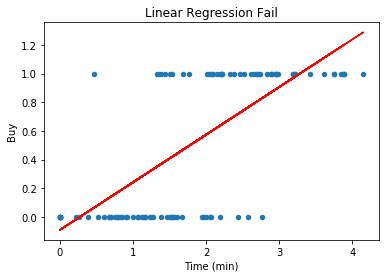

In [68]:
# show how poorly they do
y_pred = model.predict(X)

df.plot(kind='scatter', x='Time (min)', y='Buy', title='Linear Regression Fail')
plt.plot(X, y_pred, color='red')
plt.show()

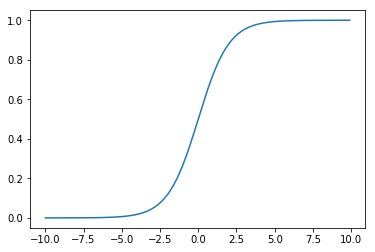

In [69]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-10, 10, 0.1)
plt.plot(z, sigmoid(z))

Text(0.5,1,'Changing b')

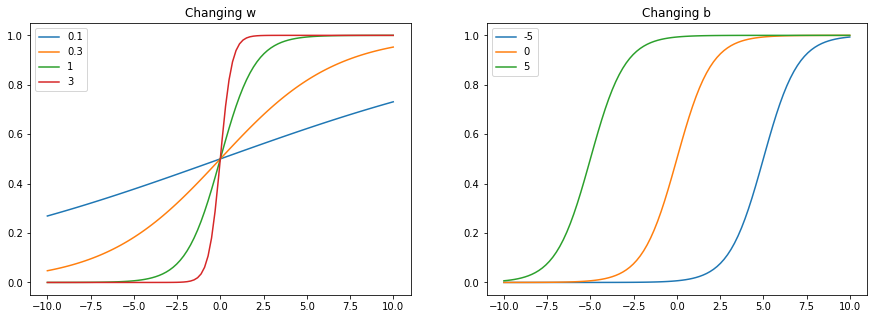

In [73]:
# let's plot some examples to help me understand what is going on...
x = np.linspace(-10, 10, 100) # note this is linspace() not arange()

plt.figure(figsize=(15, 5))
plt.subplot(121)

ws = [0.1, 0.3, 1, 3]

for w in ws:
    plt.plot(x, sigmoid(line(x, w=w)))

plt.legend(ws)
plt.title('Changing w')

plt.subplot(122)

bs = [-5, 0, 5]
for b in bs:
    plt.plot(x, sigmoid(line(x, w=1, b=b)))
    
plt.legend(bs)
plt.title('Changing b')

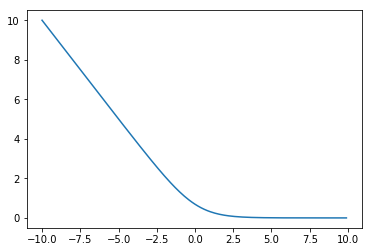

In [74]:
# illustrate that when our label is 1 (y = 1) our predictions should also approach 1
plt.plot(z, -np.log(sigmoid(z)))

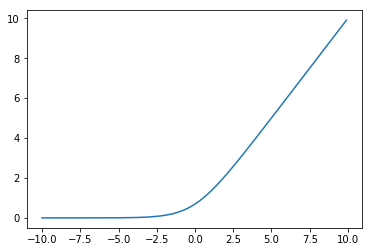

In [75]:
# let's plot the second term... when y = 0, it should push the sigmoid to 0
plt.plot(z, -np.log(1 - sigmoid(z)))

In [76]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [77]:
from keras.layers import Activation

In [78]:
model.add(Activation('sigmoid'))

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


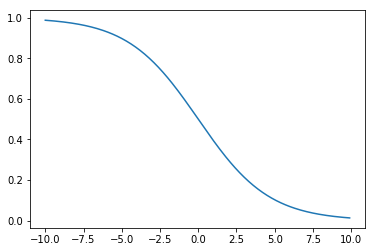

In [80]:
plt.plot(z, model.predict(z))

In [81]:
# more concise means
# model.add(Dense(1, input_dim=1, activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 0.7612 - acc: 0.4600
Epoch 2/25
100/100 [==============================] - 0s 83us/step - loss: 0.6225 - acc: 0.5700
Epoch 3/25
100/100 [==============================] - 0s 77us/step - loss: 0.6094 - acc: 0.6500
Epoch 4/25
100/100 [==============================] - 0s 79us/step - loss: 0.5699 - acc: 0.6600
Epoch 5/25
100/100 [==============================] - 0s 97us/step - loss: 0.5343 - acc: 0.7300
Epoch 6/25
100/100 [==============================] - 0s 94us/step - loss: 0.5179 - acc: 0.7900
Epoch 7/25
100/100 [==============================] - 0s 69us/step - loss: 0.4962 - acc: 0.7900
Epoch 8/25
100/100 [==============================] - 0s 91us/step - loss: 0.4883 - acc: 0.8000
Epoch 9/25
100/100 [==============================] - 0s 69us/step - loss: 0.4713 - acc: 0.7800
Epoch 10/25
100/100 [==============================] - 0s 86us/step - loss: 0.4760 - acc: 0.7900
Epoch 11/25
100/100 [===================

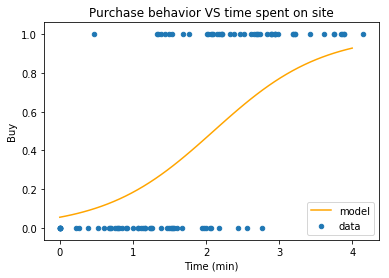

In [83]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', title='Purchase behavior VS time spent on site')
temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [84]:
y_pred = model.predict(X)

In [85]:
y_class_pred = y_pred > 0.5

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
print('Accuracy score: {:0.3f}'.format(accuracy_score(y, y_class_pred)))

Accuracy score: 0.820


In [88]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
params = model.get_weights()
params

[array([[1.350848]], dtype=float32), array([-2.8414237], dtype=float32)]

In [89]:
params = [np.zeros(w.shape) for w in params]
params

[array([[0.]]), array([0.])]

In [90]:
model.set_weights(params)

The accuracy score is 0.500


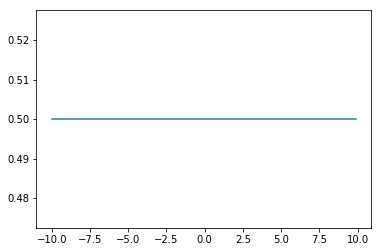

In [93]:
# check/confirm that the model is predicting garbage
acc = accuracy_score(y, model.predict(X) > 0.5)
print('The accuracy score is {:0.3f}'.format(acc))
plt.plot(z, model.predict(z))

In [94]:
# now we re-train on the training data only
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
80/80 [==============================] - 0s 123us/step - loss: 0.6648 - acc: 0.5500
Epoch 2/25
80/80 [==============================] - 0s 88us/step - loss: 0.6096 - acc: 0.5625
Epoch 3/25
80/80 [==============================] - 0s 67us/step - loss: 0.5839 - acc: 0.6125
Epoch 4/25
80/80 [==============================] - 0s 75us/step - loss: 0.5616 - acc: 0.7000
Epoch 5/25
80/80 [==============================] - 0s 68us/step - loss: 0.5450 - acc: 0.7750
Epoch 6/25
80/80 [==============================] - 0s 73us/step - loss: 0.5340 - acc: 0.7625
Epoch 7/25
80/80 [==============================] - 0s 65us/step - loss: 0.5096 - acc: 0.7875
Epoch 8/25
80/80 [==============================] - 0s 65us/step - loss: 0.4971 - acc: 0.7875
Epoch 9/25
80/80 [==============================] - 0s 67us/step - loss: 0.4856 - acc: 0.8000
Epoch 10/25
80/80 [==============================] - 0s 71us/step - loss: 0.4738 - acc: 0.8250
Epoch 11/25
80/80 [==============================] - 0s 74

In [95]:
acc = accuracy_score(y_train, model.predict(X_train) > 0.5)
print('Train accuracy score is {:0.3f}'.format(acc))

acc = accuracy_score(y_test, model.predict(X_test) > 0.5)
print('Test accuracy score is {:0.3f}'.format(acc))

Train accuracy score is 0.800
Test accuracy score is 0.750


## Cross Validation

In [97]:
from keras.wrappers.scikit_learn import KerasClassifier

In [98]:
def build_logistic_regression():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='sigmoid'))
    model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

In [102]:
model = KerasClassifier(build_fn=build_logistic_regression, epochs=25, verbose=0)

In [103]:
from sklearn.model_selection import cross_val_score, KFold

In [104]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.82352941, 0.87878788, 0.72727273])

In [105]:
m = scores.mean()
s = scores.std()
print("Cross validation accuracy: {:0.4f} +- {:0.4f}".format(m, s))

Cross validation accuracy: 0.8099 +- 0.0626


## Confusion Matrix

In [106]:
# here we define the stuffs
from sklearn.metrics import confusion_matrix

In [109]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [110]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,46,4
Buy,14,36


In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [112]:
print('Precision:\t{:0.3f}'.format(precision_score(y, y_class_pred)))
print('Recall: \t{:0.3f}'.format(recall_score(y, y_class_pred)))
print('F1 Score:\t{:0.3f}'.format(f1_score(y, y_class_pred)))

Precision:	0.900
Recall: 	0.720
F1 Score:	0.800


In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.77      0.92      0.84        50
          1       0.90      0.72      0.80        50

avg / total       0.83      0.82      0.82       100



## Feature Preprocessing

In [115]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [116]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [117]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [118]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [119]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [120]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [122]:
# Standard Normalization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)


,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


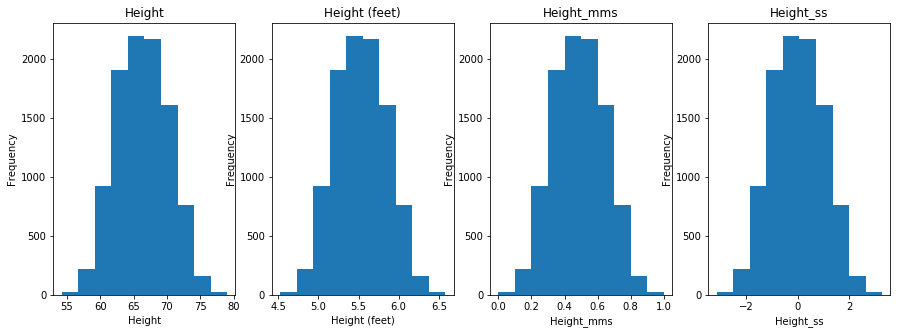

In [123]:
# show that the ditribution hasn't changed... the values are simply scaled
plt.figure(figsize=(15,5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)